In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline

### Get fit data ready

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=399999):
    try:
        data = pd.read_csv(given_fname,index_col=False,engine='python',nrows=lim)
        data.to_csv(output_fname)
    except:
        content = []
        count = 1

        with open(given_fname, 'r') as fr:
            for line in fr:
                if count <= lim:
                    #print(type(line), line)
                    content.append(line)
                    count += 1
        with open(output_fname, 'w') as fw:
            for line in content:
                # print(type(line), line)
                fw.write(line)

        data = pd.read_csv(output_fname, index_col=False,encoding= res_encoding,engine='python')

    return data

In [3]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
qso_train_drop = qso_train_partial[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
qso_train_drop = qso_train_drop[(qso_train_drop['r_LSST_magerr']>0.2)&(qso_train_drop['i_LSST_magerr']>0.2)]
redshifts26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 22.0]
redshifts26 = redshifts26[redshifts26['z_LSST_mag'] < 26.0]
redshifts26 = redshifts26['z']
qso_train_drop = qso_train_drop.drop(columns=['z', 'r_LSST_magerr', 'i_LSST_magerr'])
print('qso_train_catalog_z.csv partial data description: ')
qso_train_drop.describe()

qso_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000
mean,28.576193,26.616020,24.340320,24.201112,24.264969,24.132527
std,1.218340,1.654428,2.009015,2.089360,2.112093,2.108081
min,26.672280,23.064283,18.489759,17.989148,17.800595,17.633615
25%,27.689657,25.314514,23.136710,22.977195,23.069490,22.937156
50%,28.366448,26.540555,24.371926,24.306130,24.363508,24.192066
75%,29.189413,27.668971,25.789820,25.697926,25.766767,25.595761
max,38.902328,36.769079,32.115011,32.168396,32.742341,33.953075


(array([1986., 1725., 1511., 1102.,   95.,   74.,  366.,  489.,  380.,
         271.]),
 array([6.0001027 , 6.15004544, 6.29998818, 6.44993092, 6.59987366,
        6.7498164 , 6.89975914, 7.04970188, 7.19964462, 7.34958736,
        7.4995301 ]),
 <BarContainer object of 10 artists>)

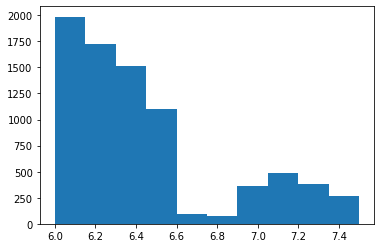

In [4]:
plt.hist(redshifts26)

In [5]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv', 599999)
mlt_train_drop = mlt_train_partial[['r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop[(mlt_train_drop['r_LSST_magerr']>0.2)&(mlt_train_drop['i_LSST_magerr']>0.2)]
mlt_train_drop = mlt_train_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('mlt_train_catalog_z.csv partial data description: ')
mlt_train_drop.describe()

mlt_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000
mean,27.846360,26.406950,24.814468,24.240156,23.941957,23.954919
std,0.866560,0.814595,0.652294,0.636044,0.633295,0.639822
min,26.565172,24.640153,22.966413,22.249321,21.884903,21.705643
25%,27.248318,25.848575,24.336096,23.782861,23.500746,23.511528
50%,27.631539,26.262382,24.722558,24.157091,23.877018,23.890470
75%,28.184954,26.792510,25.207169,24.619578,24.324022,24.337251
max,38.215437,36.198974,28.369839,27.735964,27.180561,27.305963


In [6]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
galaxies_patch8789_drop = galaxies_patch8789_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop[(galaxies_patch8789_drop['r_LSST_magerr']>0.2)&(galaxies_patch8789_drop['i_LSST_magerr']>0.2)]
galaxies_patch8789_drop = galaxies_patch8789_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_drop.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000
mean,28.112741,27.507701,27.330679,27.226355,27.160891,27.154280
std,0.888656,0.950758,0.788433,0.796900,0.827853,0.977009
min,26.647539,25.462982,25.152190,24.748167,24.475726,24.258516
25%,27.518918,26.883531,26.837638,26.737179,26.657671,26.557470
50%,27.920273,27.314756,27.248012,27.172407,27.118375,27.041903
75%,28.465759,27.895376,27.710084,27.634895,27.594613,27.601858
max,40.029429,39.261958,39.647494,40.707497,38.204669,38.379259


In [7]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
galaxies_patch8786_drop = galaxies_patch8786_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop[(galaxies_patch8786_drop['r_LSST_magerr']>0.2)&(galaxies_patch8786_drop['i_LSST_magerr']>0.2)]
galaxies_patch8786_drop = galaxies_patch8786_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_drop.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000
mean,28.100850,27.494201,27.312886,27.205306,27.141588,27.131087
std,0.886176,0.952283,0.787836,0.803831,0.842035,0.981599
min,26.573603,25.553776,25.107279,24.705397,24.460871,24.280885
25%,27.507437,26.871509,26.818015,26.714655,26.633409,26.535319
50%,27.905555,27.298765,27.235464,27.156027,27.102194,27.024863
75%,28.452905,27.883030,27.697065,27.620381,27.584424,27.588149
max,40.812877,40.422024,37.436853,38.037623,37.411129,37.630643


In [8]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

In [9]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [10]:
qso_train_26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 24.0]
qso_train_26 = qso_train_26[qso_train_26['z_LSST_mag'] < 26.0]
print(len(qso_train_26))
mlt_train_26 = mlt_train_drop[mlt_train_drop['z_LSST_mag'] > 24.0]
mlt_train_26 = mlt_train_26[mlt_train_26['z_LSST_mag'] < 26.0]
print(len(mlt_train_26))
galaxies_patch8789_26 = galaxies_patch8789_drop[galaxies_patch8789_drop['z_LSST_mag'] > 24.0]
galaxies_patch8789_26 = galaxies_patch8789_26[galaxies_patch8789_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8789_26))
galaxies_patch8786_26 = galaxies_patch8786_drop[galaxies_patch8786_drop['z_LSST_mag'] > 24.0]
galaxies_patch8786_26 = galaxies_patch8786_26[galaxies_patch8786_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8786_26))

7514
13791
778
753


In [11]:
contaminants_26 = pd.concat([mlt_train_26, galaxies_patch8789_26, galaxies_patch8786_26], ignore_index=True)
data_train_26 = pd.concat([qso_train_26, contaminants_26], ignore_index=True)
X_drop_26 = data_train_26[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop_26 = data_train_26['label']

## KNN filters

In [12]:
# 1a
# x: z_LSST_mag-J_WFI_mag
# y: Y_WFI_mag-H_WFI_mag
# best score:  0.9881756756756758
filter1a = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=3)
features1a = [X_drop_26['z_LSST_mag']-X_drop_26['J_WFI_mag'], X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag']]
X1a = np.array(features1a).transpose()

filter1a.fit(X1a, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=3)

In [13]:
# 1b
# x: Y - H 
# y: i - H
# best score:  0.9938063063063063
filter1b = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=5)
features1b = [X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['H_WFI_mag']]
X1b = np.array(features1b).transpose()

filter1b.fit(X1b, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=5)

In [14]:
# 1c 
# x: z - H
# y: J - H
# best score:  0.9463213213213213
filter1c = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=36, leaf_size=3, weights='uniform', p=5)
features1c = [X_drop_26['z_LSST_mag']-X_drop_26['H_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1c = np.array(features1c).transpose()

filter1c.fit(X1c, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=36, p=5)

In [15]:
# 1d
# x: z_LSST_mag-Y_WFI_mag
# y: i_LSST_mag-F_WFI_mag
# best score:  0.9678428428428428
filter1d = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=45, leaf_size=3, weights='uniform', p=5)
features1d = [X_drop_26['z_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['F_WFI_mag']]
X1d = np.array(features1d).transpose()

filter1d.fit(X1d, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=45, p=5)

In [16]:
# 1e
# Y - J
# J - H
# best score: deleted, assume 0.95
filter1e = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1e = [X_drop_26['Y_WFI_mag']-X_drop_26['J_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1e = np.array(features1e).transpose()

filter1e.fit(X1e, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [17]:
# 1f
# x: i - Y
# y: J - H
# best score:  0.9161036036036035
filter1f = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1f = [X_drop_26['i_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1f = np.array(features1f).transpose()

filter1f.fit(X1f, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

# Test

In [18]:
# retrieve redshift for later usage
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z', 'r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test = qso_test[(qso_test['r_LSST_magerr']>0.2)&(qso_test['i_LSST_magerr']>0.2)]
qso_test = qso_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
# qso_test = qso_test[(qso_test['z']>7.0)&(qso_test['z']<7.5)]
qso_test.describe()

,z,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000
mean,6.334597,28.835404,26.798711,25.931247,25.903342,25.938094,25.724927
std,0.310122,1.238984,1.679970,1.773994,1.803031,1.796843,1.760516
min,6.000191,26.618546,23.163809,20.452226,20.223916,20.227606,20.164541
25%,6.104868,27.976921,25.507942,24.531768,24.504636,24.559612,24.386106
50%,6.244405,28.662272,26.856947,25.846617,25.823882,25.846930,25.666564
75%,6.469143,29.429633,27.855877,27.204031,27.190811,27.212475,26.946348
max,8.482816,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085


In [19]:
gal_test0 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117135_J180J255_1130_p0.csv', index_col=False)
# gal_test0 = gal_test0.replace(99.99, np.nan).dropna()
gal_test0 = gal_test0[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test2 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p2.csv', index_col=False)
# gal_test2 = gal_test2.replace(99.989998, np.nan).dropna()
gal_test2 = gal_test2[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test3 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p3.csv', index_col=False)
# gal_test3 = gal_test3.replace(99.989998, np.nan).dropna()
gal_test3 = gal_test3[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test4 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p4.csv', index_col=False)
# gal_test4 = gal_test4.replace(99.989998, np.nan).dropna()
gal_test4 = gal_test4[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test5 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p5.csv', index_col=False)
# gal_test5 = gal_test5.replace(99.989998, np.nan).dropna()
gal_test5 = gal_test5[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test6 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p6.csv', index_col=False)
# gal_test6 = gal_test6.replace(99.989998	, np.nan).dropna()
gal_test6 = gal_test6[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test7 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p7.csv', index_col=False)
# gal_test7 = gal_test7.replace(99.989998, np.nan).dropna()
gal_test7 = gal_test7[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test8 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p8.csv', index_col=False)
gal_test8 = gal_test8[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test9 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p9.csv', index_col=False)
# gal_test9 = gal_test9.replace(99.989998, np.nan).dropna()
gal_test9 = gal_test9[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test = pd.concat([gal_test2, gal_test3, gal_test4, gal_test5, gal_test6, gal_test7, gal_test8, gal_test9], ignore_index=True)
gal_test = gal_test.rename(columns={'i_LSST_abmag': 'i_LSST_mag', 'z_LSST_abmag': 'z_LSST_mag', 'Y_WFI_abmag': 'Y_WFI_mag', 'J_WFI_abmag': 'J_WFI_mag', 'H_WFI_abmag': 'H_WFI_mag', 'F_WFI_abmag': 'F_WFI_mag'})

In [20]:
# gal_test = gal_test.sample(frac=0.15, random_state=42)
gal_test.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,937072.000000,937072.000000,937072.000000,937072.000000,937072.000000,937072.000000
mean,28.351886,28.286000,25.968517,25.356040,25.199217,25.095960
std,5.406274,8.363648,0.213025,0.122607,0.153367,0.177582
min,27.173052,26.408033,24.979404,24.473455,24.240412,24.038563
25%,27.667616,26.955724,25.825436,25.295492,25.118233,24.993437
50%,27.830496,27.171208,25.965383,25.386971,25.223930,25.110626
75%,28.089520,27.515009,26.100325,25.449694,25.302738,25.213701
max,99.989998,99.989998,27.625261,25.500000,25.784363,25.946293


In [21]:
mlt_test = read_data_partial('mlt_test_catalog_z.csv', 'mlt_test_catalog_z26.csv', 120000)
mlt_test = mlt_test[['spt', 'r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test = mlt_test[(mlt_test['r_LSST_magerr']>0.2)&(mlt_test['i_LSST_magerr']>0.2)]
mlt_test = mlt_test.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


,spt,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.0
mean,13.067001,27.294287,25.684152,24.222748,23.659324,23.357716,23.372401,0.0
std,2.983720,0.388016,0.231342,0.295505,0.317678,0.377004,0.388734,0.0
min,7.000000,26.601001,24.571247,22.301314,22.013013,21.873094,21.742619,0.0
25%,11.000000,27.036202,25.538164,24.027244,23.452812,23.114613,23.130337,0.0
50%,13.000000,27.206518,25.726646,24.225623,23.658451,23.360445,23.377344,0.0
75%,15.000000,27.458651,25.871890,24.418692,23.872214,23.612628,23.627727,0.0
max,29.000000,32.622297,25.999972,25.767020,25.011076,24.808649,25.154299,0.0


In [22]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
qso_test_copy['spt'] = np.zeros(len(qso_test_copy))
gal_test_copy = gal_test.copy().replace([99.989998, 99.99], np.nan).dropna()
gal_test_copy['label'] = np.zeros(len(gal_test_copy))
gal_test_copy['spt'] = np.zeros(len(gal_test_copy))

In [23]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
# test0 = pd.concat([qso_test_copy, gal_test_copy, mlt_test_copy], ignore_index=True)
test0 = pd.concat([qso_test_copy, gal_test_copy], ignore_index=True)
test = test0[['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label
count,941342.000000,941342.000000,941342.000000,941342.000000,941342.000000,941342.000000,941342.000000
mean,28.354080,28.279254,25.968348,25.358523,25.202568,25.098813,0.004536
std,5.394742,8.346023,0.243827,0.176238,0.201301,0.217335,0.067198
min,26.618546,23.163809,20.452226,20.223916,20.227606,20.164541,0.000000
25%,27.667881,26.954671,25.824708,25.295176,25.117912,24.993095,0.000000
50%,27.831539,27.170879,25.965326,25.387072,25.224108,25.110809,0.000000
75%,28.092688,27.515767,26.100904,25.450016,25.303234,25.214422,0.000000
max,99.989998,99.989998,35.672331,33.879891,34.514265,34.228085,1.000000


In [24]:
test_copy = test.copy()
test_copy = test_copy[test_copy['z_LSST_mag'] > 24.0]
test_copy = test_copy[test_copy['z_LSST_mag'] < 26.0]

In [25]:
print(len(test_copy[test_copy['label'] == 1]))

1344


In [26]:
print(len(test_copy))

1344


### Apply the filters to the entire test catalog

In [27]:
test0c = test0.copy()
print('# of quasars in 24 < z < 26:', len(test_copy[test_copy['label'] == 1]))
print('# of quasars in the entire test catalog:', len(test0c[test0c['label'] == 1]))

# of quasars in 24 < z < 26: 1344
# of quasars in the entire test catalog: 4270


In [28]:
# x: z - J
# y: Y - H
testf_1a = [test0c['z_LSST_mag']-test0c['J_WFI_mag'], test0c['Y_WFI_mag']-test0c['H_WFI_mag']]

prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())

test0c['prob_1a'] = prob_1a[:, 1]

In [29]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([test0c['Y_WFI_mag']-test0c['H_WFI_mag'], test0c['i_LSST_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1b'] = prob_1b[:, 1]

In [30]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([test0c['z_LSST_mag']-test0c['H_WFI_mag'], test0c['J_WFI_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1c'] = prob_1c[:, 1]

In [31]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([test0c['z_LSST_mag']-test0c['Y_WFI_mag'], test0c['i_LSST_mag']-test0c['Y_WFI_mag']]).transpose())

test0c['prob_1d'] = prob_1d[:, 1]

In [ ]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([test0c['Y_WFI_mag']-test0c['J_WFI_mag'], test0c['J_WFI_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1e'] = prob_1e[:, 1]

In [ ]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([test0c['i_LSST_mag']-test0c['Y_WFI_mag'], test0c['J_WFI_mag']-test0c['H_WFI_mag']]).transpose())

test0c['prob_1f'] = prob_1f[:, 1]

In [ ]:
# use best scores as weights:
weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
probabilities = test0c[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

In [ ]:
test0c['weighted prob'] = wprob
test0c.head()

In [ ]:
pred_qso = test0c[test0c['weighted prob'] > 0.6]
pred_qso.describe()

In [ ]:
tp = pred_qso.merge(qso_test)
# tp = tp.drop(columns=['z_LSST_magerr', 'spt', 'i_LSST_mag'])
tp.describe()

In [ ]:
print('redshift distribution of TP:')
plt.hist(tp['z'])

In [ ]:
# false positive: the difference between tp and pred positive
fp = pd.merge(tp, pred_qso, on=['z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [ ]:
fp.describe()

In [ ]:
fp = fp.drop(columns=['label_x', 'z_x', 'label_x', 'weighted prob_x', 'prob_1a_x', 'prob_1b_x' , 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x'])
fp.rename(columns={'label_y': 'label', 'spt_y': 'spt', 'weighted prob_y':'weighted_prob', 'z_y': 'z'}, inplace=True)
fp.describe()

In [ ]:
print('spectral type distribution of FP:')
plt.hist(fp['spt'])

In [ ]:
plt.hist(fp['J_WFI_mag'], fill=False, edgecolor='green', label='gal')

plt.xlabel('J band')
plt.ylabel('log(number)')
plt.yscale('log')
plt.title('FP distribution')
plt.legend()
plt.show()

In [ ]:
# false negative: the difference between all positive and true positive
fn = pd.merge(tp, qso_test, on=['i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn = fn.drop(columns=['z_x'])
fn = fn.rename(columns={'z_y':'z'})
fn.describe()

In [ ]:
print('redshift distribution of FN:')
plt.hist(fn['z'])

In [ ]:
print('w/ snr constraints, probability prediction results:\n')
print('precision:', round(tp.shape[0]/(tp.shape[0]+fp.shape[0]), 4))
print('recall:', round(tp.shape[0]/(tp.shape[0]+fn.shape[0]), 4))

In [ ]:
hist11, bins11, _ = plt.hist(qso_test['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp['z'], bins11, fill=False, label='TP (threshold=0.6)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()

In [ ]:
plt.hist(tp['z_LSST_mag'], bins=20, label='TP')
plt.hist(fn['z_LSST_mag'], bins=20, label='FN', fill=False, edgecolor='orange')

plt.xlabel('z band mag')
plt.ylabel('# of quasars')
plt.title('entire test catalog (z)')
plt.legend()
plt.show()

In [ ]:
plt.hist(tp['z_LSST_mag'], bins=20, label='TP')
plt.hist(fn['z_LSST_mag'], bins=20, label='FN', fill=False, edgecolor='orange')

plt.xlabel('z band mag')
plt.ylabel('# of quasars')
plt.title('entire test catalog (z)')
plt.xlim(22.0, 26.0)
plt.legend()
plt.show()

In [ ]:
plt.hist(tp[(tp['z_LSST_mag']>24.0)&(tp['z_LSST_mag']<26.0)]['z_LSST_mag'], label='TP')
plt.hist(fn[(fn['z_LSST_mag']>24.0)&(fn['z_LSST_mag']<26.0)]['z_LSST_mag'], label='FN', fill=False, edgecolor='orange')

plt.xlabel('z band mag')
plt.ylabel('# of quasars')
plt.title('entire test catalog (z)')
plt.legend()
plt.show()

In [ ]:
plt.hist(tp[(tp['z_LSST_mag']>23.0)&(tp['z_LSST_mag']<26.0)]['z_LSST_mag'], label='TP')
plt.hist(fn[(fn['z_LSST_mag']>23.0)&(fn['z_LSST_mag']<26.0)]['z_LSST_mag'], label='FN', fill=False, edgecolor='orange')

plt.xlabel('z band mag')
plt.ylabel('# of quasars')
plt.title('entire test catalog (z)')
plt.legend()
plt.show()

In [ ]:
plt.hist(qso_test['J_WFI_mag'], bins=20, label='quasars')

plt.xlabel('J band mag')
plt.ylabel('# of quasars')
plt.title('entire test catalog (J)')
plt.legend()
plt.show()

In [ ]:
plt.hist(tp['J_WFI_mag'], bins=20, label='TP')

plt.xlabel('J band mag')
plt.ylabel('# of quasars')
plt.title('entire test catalog (J)')
plt.legend()
plt.show()

In [ ]:
hist11, bins11, _ = plt.hist(qso_test[qso_test['J_WFI_mag'] < 26.2]['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp[tp['J_WFI_mag'] < 26.2]['z'], bins11, fill=False, label='TP (threshold=0.6)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.title('J < 26.2')
plt.show()

In [104]:
print('w snr constraints, probability prediction results, J < 26.2:\n')
print('precision:', round(tp[tp['J_WFI_mag'] < 26.2].shape[0]/(tp[tp['J_WFI_mag'] < 26.2].shape[0]+fp[fp['J_WFI_mag'] < 26.2].shape[0]), 4))
print('recall:', round(tp[tp['J_WFI_mag'] < 26.2].shape[0]/(tp[tp['J_WFI_mag'] < 26.2].shape[0]+fn[fn['J_WFI_mag'] < 26.2].shape[0]), 4))

w snr constraints, probability prediction results, J < 26.2:

precision: 0.4373
recall: 0.9385


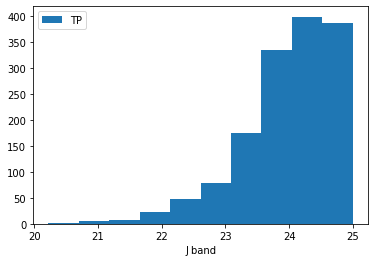

In [105]:
plt.hist(tp[tp['J_WFI_mag']<25.0]['J_WFI_mag'], label='TP')
plt.xlabel('J band')
plt.legend()
plt.show()

In [106]:
def precision(TP, FP, FN, val):
    return round(TP[TP['J_WFI_mag']<val].shape[0]/(TP[TP['J_WFI_mag']<val].shape[0]+FP[FP['J_WFI_mag']<val].shape[0]), 4)


def recall(TP, FP, FN, val=25.0):
    return round(TP[TP['J_WFI_mag']<val].shape[0]/(TP[TP['J_WFI_mag']<val].shape[0]+FN[FN['J_WFI_mag']<val].shape[0]), 4)

In [107]:
print('# of TP at J < 24.5:', tp[tp['J_WFI_mag'] < 24.5].shape[0])
print('# of FP at J < 24.5:', fp[fp['J_WFI_mag'] < 24.5].shape[0])
print('# of FN at J < 24.5:', fn[fn['J_WFI_mag'] < 24.5].shape[0])
print('precision score at J < 24.5: ', precision(tp, fp, fn, 24.5))
print('recall score at J < 24.5: ', recall(tp, fp, fn, 24.5))

# of TP at J < 24.5: 1047
# of FP at J < 24.5: 43
# of FN at J < 24.5: 14
precision score at J < 24.5:  0.9606
recall score at J < 24.5:  0.9868


In [108]:
print('# of TP at J < 25.0:', tp[tp['J_WFI_mag'] < 25.0].shape[0])
print('# of FP at J < 25.0:', fp[fp['J_WFI_mag'] < 25.0].shape[0])
print('# of FN at J < 25.0:', fn[fn['J_WFI_mag'] < 25.0].shape[0])
print('precision score at J < 25.0: ', precision(tp, fp, fn, 25.0))
print('recall score at J < 25.0: ', recall(tp, fp, fn, 25.0))

# of TP at J < 25.0: 1453
# of FP at J < 25.0: 45
# of FN at J < 25.0: 23
precision score at J < 25.0:  0.97
recall score at J < 25.0:  0.9844


In [109]:
print('# of TP at J < 25.5:', tp[tp['J_WFI_mag'] < 25.5].shape[0])
print('# of FP at J < 25.5:', fp[fp['J_WFI_mag'] < 25.5].shape[0])
print('# of FN at J < 25.5:', fn[fn['J_WFI_mag'] < 25.5].shape[0])
print('precision score at J < 25.5: ', precision(tp, fp, fn, 25.5))
print('recall score at J < 25.5: ', recall(tp, fp, fn, 25.5))

# of TP at J < 25.5: 1830
# of FP at J < 25.5: 2948
# of FN at J < 25.5: 49
precision score at J < 25.5:  0.383
recall score at J < 25.5:  0.9739


J-band distribution of FP:


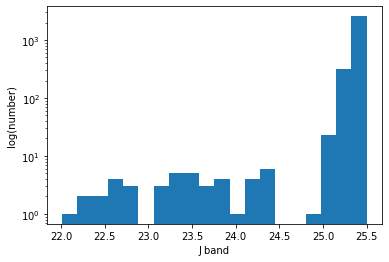

In [110]:
print('J-band distribution of FP:')
plt.hist(fp[fp['J_WFI_mag']<26.2]['J_WFI_mag'], bins=20)
plt.yscale('log')
plt.xlabel('J band')
plt.ylabel('log(number)')
plt.show()

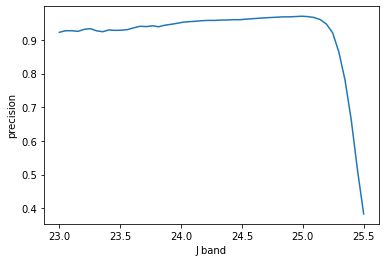

mean, J <= 25.5: 0.9177


In [111]:
x = np.linspace(23.0, 25.5, 50)
y = [precision(tp, fp, fn, val) for val in x]
plt.plot(x, y)
plt.xlabel('J band')
plt.ylabel('precision')
plt.show()

print('mean, J <= 25.5:', round(np.mean(y), 4))

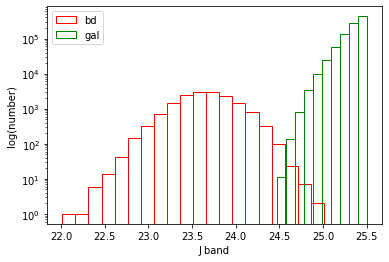

In [136]:
plt.hist(mlt_test['J_WFI_mag'], bins=20, fill=False, edgecolor='red', label='bd')
plt.hist(gal_test['J_WFI_mag'], fill=False, edgecolor='green', label='gal')

plt.xlabel('J band')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()